# Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [58]:
from keras.models import Input,Model
from keras.layers import Dense,Activation,Dropout,Flatten,MaxPool2D,Conv2D
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [30]:
# from keras.models import Input,Model
# from keras.layers import Dense,Activation,Dropout,Flatten,MaxPool2D,Conv2D
# from keras.applications.vgg16 import VGG19,preprocess_input,decode_predictions

# Training set

In [59]:
train_datagen=ImageDataGenerator(rescale = 1./255)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/training',target_size=(299,299),class_mode='binary',
                                              batch_size=32)
# training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Guneet Workspace/Garbage classification/Garbage classification',target_size=(224,224),class_mode='categorical',
#                                                batch_size=8,shuffle=True,color_mode='rgb')

Found 5882 images belonging to 2 classes.


# CNN Model 


**Inception**

In [60]:
ptm=InceptionResNetV2(input_shape=(299,299,3),weights='imagenet',include_top=False)
for layer in ptm.layers:
    layer.trainable = False

219070464/219055592 [==============================] - 3s 0us/step


In [61]:
flat=Flatten()(ptm.output)
out=Dense(units=1,activation='sigmoid')(flat)
model=Model(inputs=ptm.input,outputs=out)

In [62]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint('Inception_resnet_V2.h5', verbose=1, save_best_only=True)

# Compiling the model

In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model Summary

In [64]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [66]:
model.fit(x=training_set,epochs=3,callbacks=checkpoint)

Epoch 1/3
184/184 [==============================] - 155s 763ms/step - loss: 0.6128 - accuracy: 0.8764
Epoch 2/3
184/184 [==============================] - 137s 746ms/step - loss: 0.2728 - accuracy: 0.9459
Epoch 3/3
184/184 [==============================] - 137s 744ms/step - loss: 0.1375 - accuracy: 0.9702


# Saving the model

In [81]:
model.fit(x=training_set,epochs=7,callbacks=checkpoint)

Epoch 1/7
184/184 [==============================] - 137s 746ms/step - loss: 0.0925 - accuracy: 0.9823
Epoch 2/7
184/184 [==============================] - 137s 744ms/step - loss: 0.0464 - accuracy: 0.9891
Epoch 3/7
184/184 [==============================] - 137s 745ms/step - loss: 0.0801 - accuracy: 0.9878
Epoch 4/7
184/184 [==============================] - 137s 743ms/step - loss: 0.0659 - accuracy: 0.9876
Epoch 5/7
184/184 [==============================] - 137s 743ms/step - loss: 0.1428 - accuracy: 0.9777
Epoch 6/7
184/184 [==============================] - 137s 742ms/step - loss: 0.1817 - accuracy: 0.9755
Epoch 7/7
184/184 [==============================] - 137s 743ms/step - loss: 0.0339 - accuracy: 0.9935


In [82]:
from keras.models import load_model
model.save("inception-Resnet-V2.h5")
metrics=pd.DataFrame(model.history.history)

In [83]:
metrics

,loss,accuracy
0,0.092511,0.982319
1,0.046391,0.989119
2,0.080075,0.987759
3,0.065921,0.987589
4,0.142795,0.977729
5,0.181710,0.975519
6,0.033929,0.993540


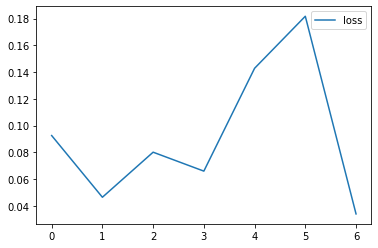

In [84]:
metrics[['loss']].plot()

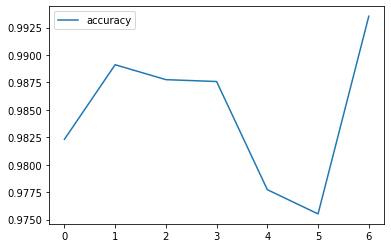

In [85]:
metrics[['accuracy']].plot()

In [87]:
original=[]
y_pred=[]

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [89]:
from keras.preprocessing import image
import matplotlib.image as img

In [90]:
for image_name in os.listdir("/content/drive/MyDrive/test/background"):

  original.append(int(image_name.split("_")[1].split(".")[0]))                  #taking out 0s and 1s from combined test set

  test_image = image.load_img('/content/drive/MyDrive/test/background/'+ str(image_name), target_size = (299,299))
  test_image = image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)

  if result < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [91]:
for image_name in os.listdir("/content/drive/MyDrive/test/hi"):

  original.append(int(image_name.split("_")[1].split(".")[0]))                  #taking out 0s and 1s from combined test set

  test_image = image.load_img('/content/drive/MyDrive/test/hi/'+ str(image_name), target_size = (299,299))
  test_image = image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)

  if result < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [92]:
len(y_pred)


98

In [93]:
count=0
for i in range(len(y_pred)):
  if y_pred[i]==original[i]:
    count=count+1

accuracy=count/len(y_pred)

In [94]:
print(accuracy)

0.9081632653061225


In [95]:
#from sklearn.metrics import r2_score

In [96]:
#r2_score(original,y_pred)